In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading data into pandas data frame,the data doesn't contain header and parameter names will be used to assign the header 
header=["buying","maint","doors","persons","lug_boot","safety","car"]
df=pd.read_csv("car.data",names=header)

In [4]:
#reading the first five row of the data

df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#reading the last five row of the data

df.tail()

,buying,maint,doors,persons,lug_boot,safety,car
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [6]:
#get the number of rows and columns
df.shape

(1728, 7)

In [7]:
#to get more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


MOST OF THE COLUMNS ARE OF OBJECT TYPE AND FOR ML ALGORIMTHS TO HANDLE THEM WELL,WE NEED TO CONVER THEM TO NIMERIC

In [8]:
#encoding the categorical columns
enc= OrdinalEncoder()

trans_df=pd.DataFrame(enc.fit_transform(df.iloc[:,0:-1]),columns=header[0:-1])

In [9]:
trans_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [10]:
trans_df=pd.concat([trans_df,df[["car"]]],axis=1)

In [11]:
trans_df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,3.0,3.0,0.0,0.0,2.0,1.0,unacc
1,3.0,3.0,0.0,0.0,2.0,2.0,unacc
2,3.0,3.0,0.0,0.0,2.0,0.0,unacc
3,3.0,3.0,0.0,0.0,1.0,1.0,unacc
4,3.0,3.0,0.0,0.0,1.0,2.0,unacc


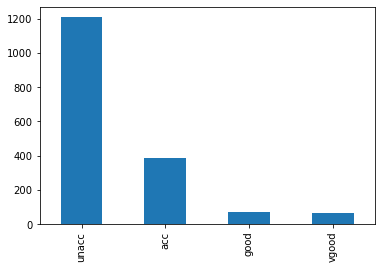

In [12]:
#checking for imbalance set in the label column

trans_df["car"].value_counts().plot(kind="bar")


THIS CONTAIN IMBALANCE CLASSES,BUT THE AIM OF THIS IS TO USE ACCURACY FOR THE METRIC

In [13]:
trans_df["car"]=trans_df["car"].map({"unacc":1,"acc":2,"good":3,"vgood":4})

In [14]:
#spliting the data into train and evaluation set
label=trans_df.pop("car")
feature_train,feature_test,label_train,label_test=train_test_split(trans_df,label,test_size=0.1,random_state=20)

In [15]:
#using k-fold to split the feature column into a new feature and validation feature and track where there is high accurcy.

k_fold=KFold(n_splits=8)

accuracy_list=[]
index_list=[]
lr=LogisticRegression(multi_class="auto",max_iter=2000)
rf=RandomForestClassifier(n_estimators=10,max_depth=5,max_features=0.8 ,random_state=20)

for train_index,val_index in k_fold.split(feature_train):
    X_train,Y_train=feature_train.iloc[train_index],label_train.iloc[train_index]
    X_val,Y_val=feature_train.iloc[val_index],label_train.iloc[val_index]
    rf.fit(X_train,Y_train)
    y_pred=rf.predict(X_val)
    accuracy=accuracy_score(y_pred,Y_val)
    accuracy_list.append(accuracy)
    index_list.append((train_index,val_index))
    
maximum=accuracy_list.index(max(accuracy_list))
real_index=index_list[maximum]

    

In [16]:
#extracting the best dataset

perfect_x_train=feature_train.iloc[real_index[0]]
perfect_y_train=label_train.iloc[real_index[0]]
perfect_x_val=feature_train.iloc[real_index[1]]
perfect_y_val=label_train.iloc[real_index[1]]

In [17]:
#now training the model with best dataset

rf.fit(perfect_x_train,perfect_y_train)
y_train_pred=rf.predict(perfect_x_train)
y_val_pred=rf.predict(perfect_x_val)

print(f"Accuracy on train_data is {accuracy_score(y_train_pred,perfect_y_train)}")
print(f"Accuracy on val_data is {accuracy_score(y_val_pred,perfect_y_val)}")


Accuracy on train_data is 0.8986039676708303
Accuracy on val_data is 0.9278350515463918
